# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

## Get data

In [2]:
N1 = 1000
N2 = 10
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-2, -2],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

clf


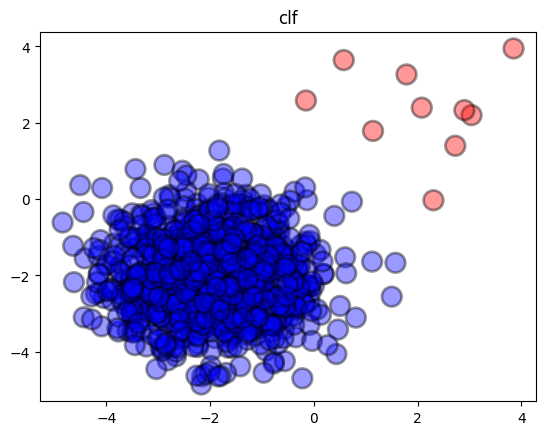

SMOTE


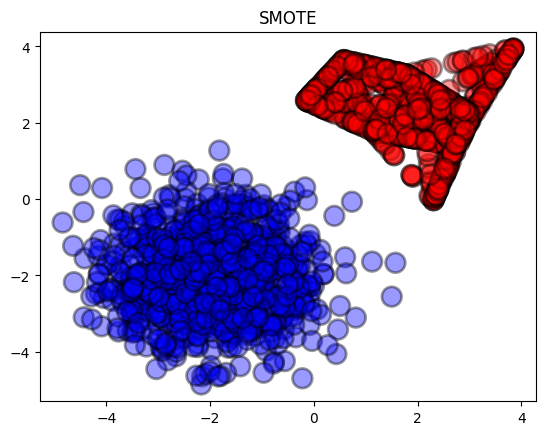

clf


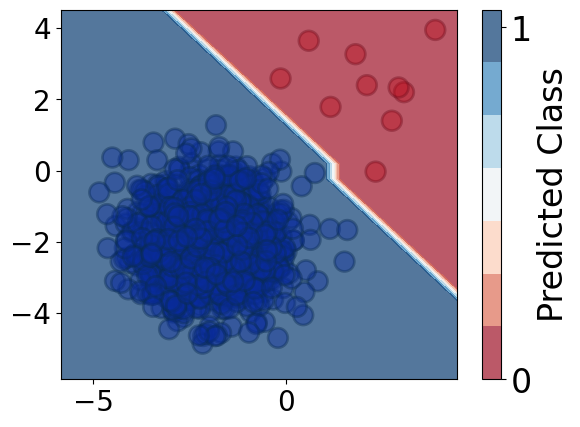

SMOTE


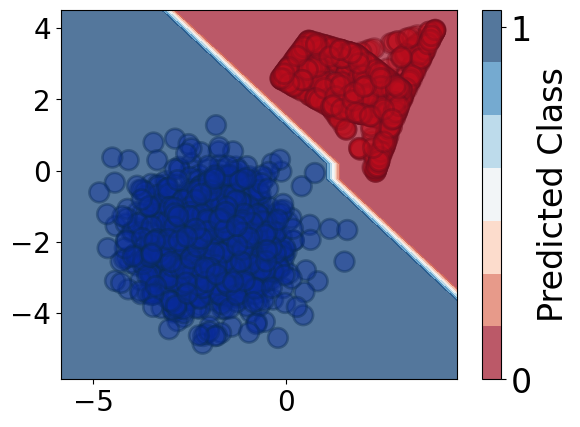

In [3]:
model = 'SVM-linear'
# model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf,
                      _plot_data=True)

## Fit deltas

Original Data


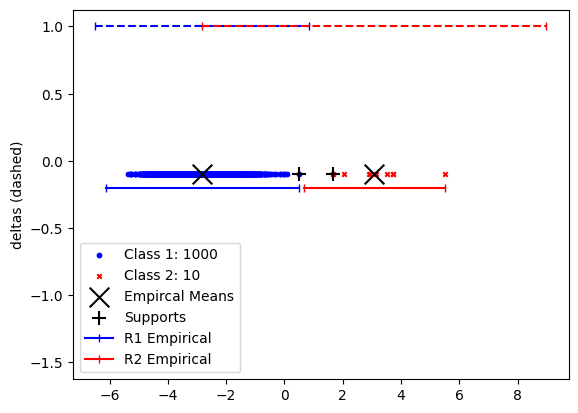

Unable to find result with downsample, increase the max_trials


In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, _print=True, _plot=True, max_trials=100000, grid_search=False)

## Plot training data information

In [5]:
deltas_model.plot_data(data_clf)

Not fit to any data yet, call 'fit(X, y)'  method first


## See how classifier's boudnary changes with delta

In [6]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [7]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
original accuracy: 0.9868
deltas accuracy: 0.9868
SMOTE accuracy: 0.9868

original F1: 0.9866315576260887
deltas F1: 0.9866315576260887
SMOTE F1: 0.9866315576260887

original precision1 (red): 0.9748341786968396
deltas precision1 (red): 0.9748341786968396
SMOTE precision1 (red): 0.9748341786968396

original precision2 (blue): 0.9993844891259746
deltas precision2 (blue): 0.9993844891259746
SMOTE precision2 (blue): 0.9993844891259746

original


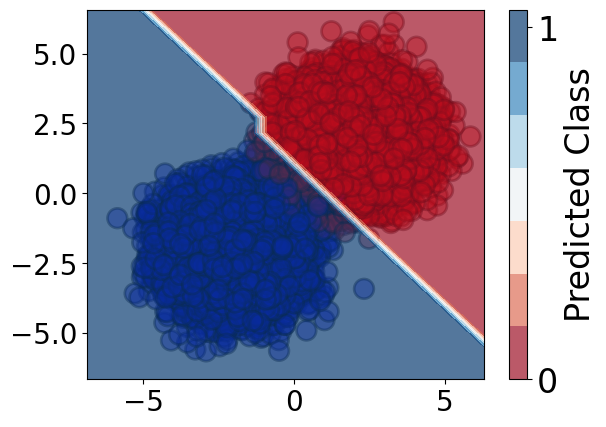

deltas
Not fit to any data yet, call 'fit(X, y)' or  method first


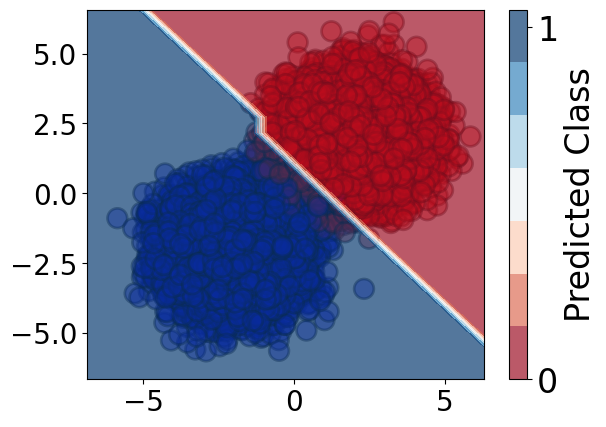

SMOTE


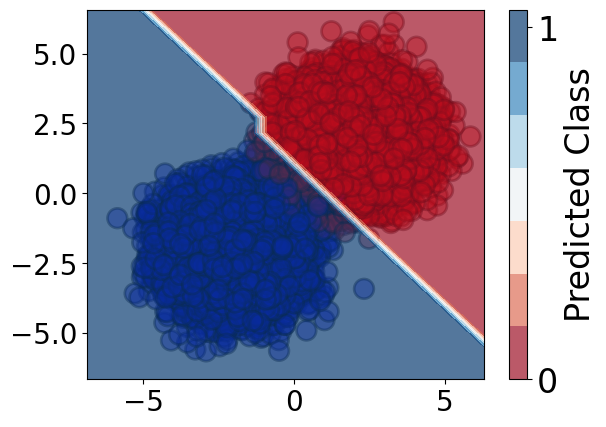

Giving bias from original classifier


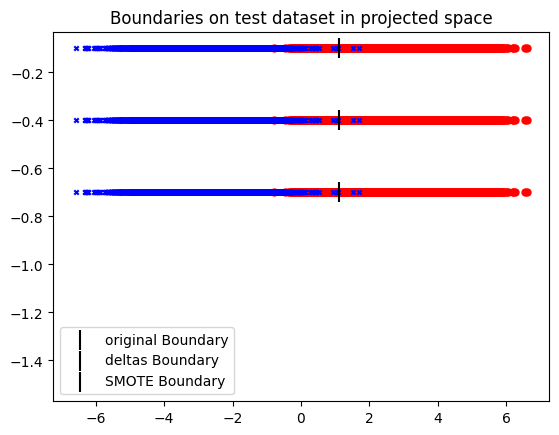

In [8]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
evaluation.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)